# Understanding Philippines’ Trading Allies: Can China hold the Philippine Economy Hostage?

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import contextily as ctx
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

<div><span style="background-color: #425564; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">EXECUTIVE SUMMARY </span></div>

Globalization is one of the means so that a country can achieve a certain level of sustainability especially that not all resources (products or goods) are available or even accessible within its jurisdiction. Smaller nations tend to be trade-dependent compared to larger ones. Being a developing country, the Philippines relies heavily on imports for certain goods and products. By looking into the imports data of the Bureau of Customs, we now have an overview of Philippine importation data, and **what types of goods are mostly imported**. This study aims to understand the **extent of trade the Philippines conducts with other countries and to what extent does China dominates**.

In this study, import data from the Bureau of Customs covering President Rodrigo Duterte’s term from July 2016 to April 2020 (which was the latest data at the time of writing) was explored. This is not necessarily an assessment of his trade policies but was only chosen to maintain homogeneity in relation to the type of administration.

During this period, the Philippines has traded with over 200 countries, with the highest in terms of value of goods being China, Japan, South Korea and the United States of America. Machinery and electrical products are the most imported items where 41% of which comes from just China and Japan. Across different categories, China remains to be in the top 5 while obtaining the top position in 11 out of the 15 product categories. 

Evidenced by this study, **China is clearly the biggest exporter to the Philippines**. This allows China to have a strong influence on the Philippine economy. This causes the Philippines to grow dependent to China, it might not affect the Philippine's economy in the short term, however it has affected the Philippines from a political perspective in the present and will continue to in the future. A strong trade relationship  with the said country may be good for our country due to the abundance of products China has, but given the current situation in the world, this might cause weakening of our relationships with other countries and even sever ties with others. Thus, it is imminent that the Philippines balances this out through enhancement of trade relationships by means of diversification. 

Our ASEAN neighbors such as Vietnam, Thailand, Indonesia, Singapore are countries where the Philippines could potentially increase imports from to increase diversity, given we already have good trade relationships with them based on our analyses. 

<div><span style="background-color: #425564; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">INTRODUCTION</span></div>

The Philippines to a great extent is an open economy. The Philippines is the 37<sup>th</sup> largest export economy in the world as per export statistics. According to the [Bureau of Custom’s 2019 Annual Report](http://customs.gov.ph/wp-content/uploads/2020/05/BOCAR2019-1.pdf), taxes obtained from these imports have made the Bureau of Customs the country’s second-largest revenue-generating agency of the government. Therefore, it is imperative to understand the sources of our imports

Over 70% of the overall imported value of shipments in 2019 came from the top 10 export partners of the Philippines. Among these export partners are China, Japan, South Korea, United States, Malaysia, Singapore, Indonesia and Thailand. Majority of its import partners are members of the ASEAN-China Free Trade Area, a product of a signed agreement between the ministers of the ASEAN and China, intended for [enlarging market size, removing trade barriers, and improved investment prospects](https://asean.org/?static_post=the-economic-benefits-to-asean-of-the-asean-china-free-trade-area-acfta-by-raul-l-cordenillo). 

Through importation, the Philippines has established mutually beneficial relationships with its neighboring countries and the rest of the world. In this study, we will identify the countries, industries, and products that heavily impacts our econonmy through importation.

<div><span style="background-color: #425564; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">DATA DESCRIPTION</span></div>

The data used for this report was obtained from the Import Reports released monthly by the [Bureau of Customs](http://customs.gov.ph/import-reports/). For this study, focused was placed on the current administration. Data used was from July 2016 to April 2020 which totals to 13,662,638 rows and 7 columns. [Table 1](#table1) shows the data description:

<a id="table1"></a> 
#### Table 1. Data dictionary
| Data | Data type | Description |
| ---- | --------- | ------ |
| `HSCODE`          |Integer| Harmonized Tarrif Codes|
| `COUNTRYEXPORT`   |String|Country where the exporter is located|
| `CUSTOMSVALUE`    |Float|Total value of goods (USD)|
| `Exchange_Rate`   |Float|Exchange Rate Used|
| `VAT_PAID`        |Float|Amount of VAT Paid (PHP)|
| `DUTIESTAXES`     |Float|Total Tax Paid|
| `GOODSDESCRIPTION`|String|Description of the item|




<div><span style="background-color: #425564; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">METHODOLOGY</span></div>



To understand the trade activity of the Philippines interms of imports from countries and the value they bring in the country, these processes were performed. The general workflow for exploring the Customs data as shown in [Figure 1](#fig1) involves the following steps:

1. Data Extraction
2. Data Pre-Processing
3. Data Processing
4. Data Storage
5. Exploratory Data Analysis

Each step of the workflow will be discussed in the succeeding sections.
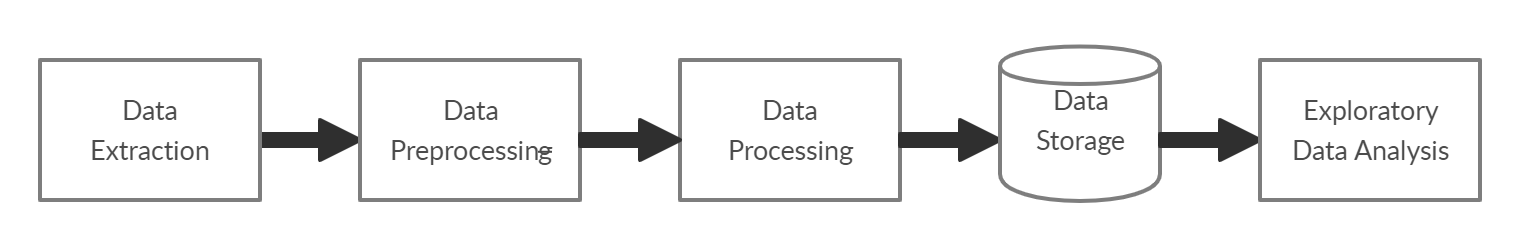

<a id="fig1"></a>
<b> Figure 1. Workflow for exploratory data analysis on Customs data </b>

### 1. Data Extraction
The data was extracted from path `/mnt/data/public/customs` in Jojie. The files are in Microsoft Excel Open XML Spreadsheet (xlsx) format and marked by the corresponding month and year of the report.

The extraction method used to download the files from the [Bureau of Customs](http://customs.gov.ph/import-reports/) to Jojie is unknown to the researchers.

### 2. Data Pre-Processing

Data profiling was implemented on the raw files in the path `/mnt/data/public/customs`. The scope of the data profilling are as follows:

- Identifying the files, the covered period of each file, and the number of sheets per file
- Converting the files from Microsoft Excel Open XML Spreadsheet (xlsx) file format to comma-separated values (csv) file format and storing to `./converted_csv_data`

For more details, the source code for data profiling can be found [here](./supplementary_scripts/data%20profiling.ipynb).

Data preprocessing was implementted on the csv files stored in `./converted_csv_data`. The scope of the data preprocessing are as follows:

- Appending the datasets per year
- Omitting unnecessary columns and standardizing the column names
- Removing outlier[<sup>[1]</sup>](#Note1)
- Storing the files to `./processed_data`

For more details, the source code for data preprocessing can be found [here](./supplementary_scripts/data%20preparation.ipynb).


### 3. Data Processing

Data processing was implemented on the csv files stored in `./processed_data`. The scope of the data processing are as follows:

- Geocoding each valid country[<sup>[2]</sup>](#Note2) in `COUNTRYEXPORT` column to obtain longitude and latitude
- Aggregating the `CUSTOMSVALUEPHP`[<sup>[3]</sup>](#Note3) of all data sets by `COUNTRYEXPORT` and HSCODE `category`[<sup>[4]</sup>](#Note4)
- Aggregating the `CUSTOMSVALUEPHP` with and without China for every HSCODE `category`
- Aggregating the `CUSTOMSVALUEPHP` by HSCODE `category`
- Aggregating the count of words for HSCODE6 description[<sup>[5]</sup>](#Note5) AND `GOODSDESCRIPTION`

For more details, the source code for data processing can be found here: (1) [GeoCoding](./data_prep_scripts/data_prep_geocode.ipynb), and (2) [Aggregating Datasets](./data_prep_scripts/data_prep_csv.ipynb).

### 4. Data Storage
The data created from Data Processing step are stored to `./post_processed_data` as csv. These data sets are used for the visualizations in [Exploratory Data Analysis](#eda) and [Insights](#insights).


<sup> 
Notes: <br>
<a id='Note1'></a>[1] Corresponds to a transaction from 2019 with `VAT_PAID` equal to 538483406146.<br>
<a id='Note2'></a>[2] Obtained by multiplying `CUSTOMSVALUE` and `EXCHANGE_RATE` columns.  <br>
<a id='Note3'></a>[3] Excluded in the data processing are `COUNTRYEXPORT` with values: null, YUGOSLAVIA (former Fed. of), Br.ind.oc.tr, Neutral zone, Former USSR (for reference), and Former Czechoslovakia. <br>
<a id='Note4'></a>[4] Obtained by getting the first 2 digits of `HSCODE` to identify major categories as defined in [Foreign Trade Online](https://www.foreign-trade.com/reference/hscode.htm) <br>
<a id='Note5'></a>[5] Obtained`HSCODE6DESCRIPTION` from 2017 data
</sup>

<a id='eda'></a>
### 5. Exploratory Data Analysis


In the current administration alone, above **200 countries across all continents** have exported goods in the Philippines. Given this number, it appears that the Philippines is very connected with the world trade-wise, as shown in [Figure 2](#fig1).  To verify this initial findings, exploratory data analysis were performed on the dataset.


<a id="fig2"></a>

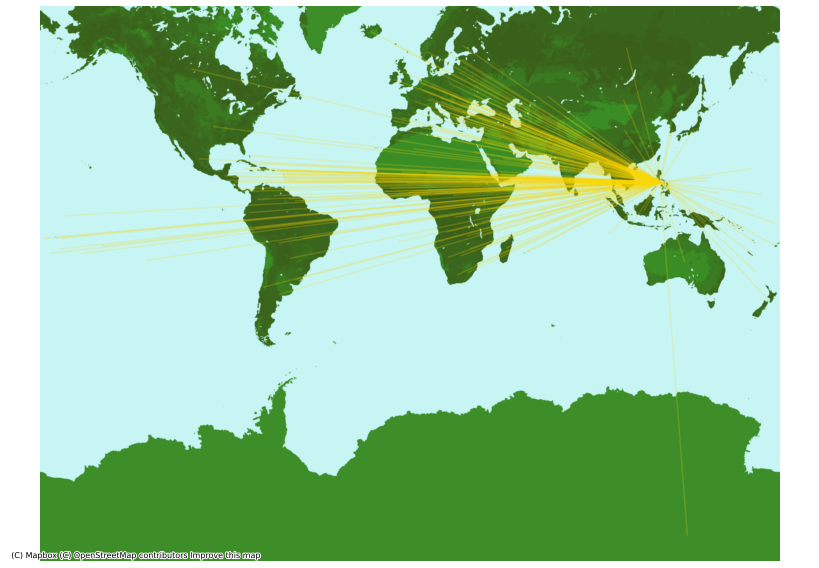

In [11]:
fp = './post_processed_data/network.shp'
df = gpd.read_file(fp)
df['COUNTRYEXPORT'] = df['Name'].str[14:]
gdf = df.to_crs(epsg=3857)

with open('mapbox_api.txt', 'r') as f:
    url = f.read()
with open('token.txt', 'r') as f:
    token = f.read()

    
ctx.providers.MapBox['url'] = (url)
ctx.providers.MapBox['accessToken'] = (token)
ctx.providers.MapBox['id']='ckav0no0c1fm61ipe1097gug4'

ax = gdf.plot(figsize=(15, 8), alpha=0.20, color='gold')
ctx.add_basemap(ax, source=ctx.providers.MapBox)
ax.axis('off');
plt.tight_layout()

<font size="2"><b><center> Figure 2. Importation Network Reach of the Philippines  </center> </b> </font>

<a id='insights'></a>
<div><span style="background-color: #425564; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">INSIGHTS</span></div>

### A. Reality Check

It may seem that the Philippines is importing across all countries but [Figure 3](#fig3) shows **the disparity between the contributions of each country** in terms of transactions and value they bring in the country. Based on this bubble map, the customs value in pesos, which can also be explained by the magnitude and frequency of the transactions of the Philippines with other countries, varies per country. It can be inferred from this that China contributes the largest, followed by Japan, then by the United States and Singapore which have approximately close values.

<a id="fig3"></a>

In [12]:
import plotly.express as px
import plotly.graph_objects as go

# Load the data for visualization
df_count = pd.read_csv('./post_processed_data/count_per_country.csv')
df_longxlat = pd.read_csv('./post_processed_data/longlat.csv')
df_longxlat = df_longxlat.rename(columns=({'Origin': 'COUNTRYEXPORT'}))

# Convert the data frame to a geopandas data frame
g_df_longxlat = (gpd.GeoDataFrame(df_longxlat, geometry=gpd.points_from_xy(
    df_longxlat['Origin_long'],
    df_longxlat['Origin_lat'])))

# Merge the geopandas data frame and data frame
merged_df = g_df_longxlat.merge(df_count, on='COUNTRYEXPORT')

merged_df = (merged_df.rename(columns=
                              {'transactions': 'Number of Transactions',
                               'CUSTOMSVALUEPHP': 'Customs Value in PHP'}))

# Plot merge_df
fig = px.scatter_mapbox(merged_df,
                        lon='Origin_long',
                        lat='Origin_lat',
                        hover_name='COUNTRYEXPORT',
                        hover_data={'COUNTRYEXPORT': False,
                                    'Number of Transactions': ':,.2',
                                    'Customs Value in PHP': ':,.2f',
                                    'Origin_long': False,
                                    'Origin_lat': False},
                        size='Number of Transactions',
                        size_max=35,
                        color='Customs Value in PHP',
                        color_continuous_scale=px.colors.sequential.YlOrRd,
                        opacity=0.80,
                        mapbox_style='carto-darkmatter',
                        zoom=1,
                        width=900,
                        height=500)

fig.update_layout(go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
))

fig.show(renderer="notebook")

<font size="2"><b><center> Figure 3: Map showing export of countries to the Philippines by frequency of transactions and total amount of goods imported. Frequency of transactions is shown by the size of the circle while amount is determined by the intensity of the color. </center> </b> </font>

### B.  The Philippines is Importing Technology


Which category takes up the biggest share in terms of value imported? In [Figure 4](#fig4) shows the biggest share belongs to the **Machinery/Electrical** category, followed by **Mineral Products** as second and **Transportation** as third. 

<a id="fig4"></a>

In [5]:
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands)
    such as 4500 into 4.5K and also appropriately turns 4000 into 4K
    (no zero after the decimal).
    """
    if tick_val >= 1e12:
        val = round(tick_val/1e12, 1)
        new_tick_format = '{:}T'.format(val)
    elif tick_val >= 1e9:
        val = round(tick_val/1e9, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1e6:
        val = round(tick_val/1e6, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1e3:
        val = round(tick_val/1e3, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1e3:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)

    # code below will keep 4.5M as is but change values such as 4.0M 
    index_of_decimal = new_tick_format.find(".")

    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + \
                new_tick_format[index_of_decimal+2:]

    return new_tick_format

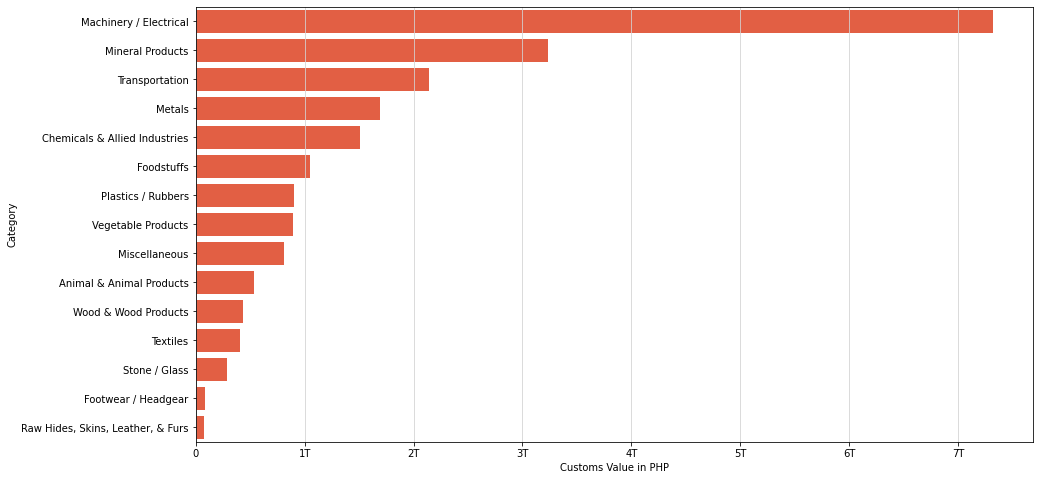

In [6]:
df_value = pd.read_csv("./post_processed_data/most_imported_by_value.csv")
plt.figure(figsize=(15,8))

ax =  sns.barplot(x=df_value['CUSTOMSVALUEPHP'],
            y=df_value['category'], color ='#fc4e2a');


ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.set_facecolor('white')
ax.grid(color='#D3D3D3', axis='x')

plt.ylabel('Category');
plt.xlabel('Customs Value in PHP');



<font size="2"><b><center> Figure 4: Item classification sorted by total customs value </center></b></font>

This word cloud in [Figure 5](#fig5) re-emphasizes the dominance of machinery and electrical items in our imported items. These items supposedly include high value items like machine parts, full industrial machinery, and electrical parts as seen in the word clouds.

<a id="fig5"></a>

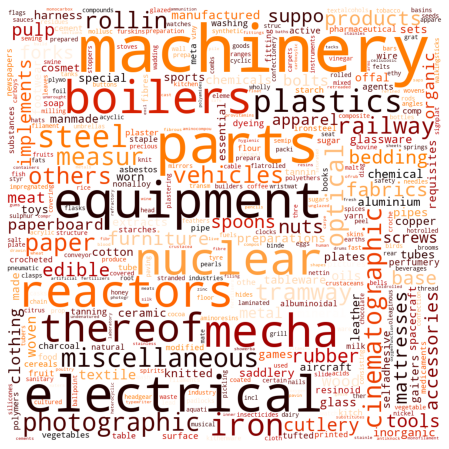

In [7]:
dfH6 = pd.read_csv('./post_processed_data/WCData_H6.csv')
wcprep = WordCloud(background_color="white", max_words=400,
                   stopwords=[], max_font_size=150,
                   random_state=42, width=1000, height=1000,
                   collocations=False, colormap='gist_heat')

data = dfH6.groupby('word')['count'].sum().to_dict()
wc = wcprep.generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
# plt.title('Goods Classification on the 6th ' 
#           'Level of HSCODE Specificity \n (2016 July to 2020 March)',
#            fontsize=14)
plt.axis("off")
plt.imshow(wc);

<font size="2"><b><center> Figure 5: Most common imported items in the Philippines based on HSCODE6 classification  </center></b></font>

Looking further at the specific goods found in these categories, it can be observed in [Figure 6](#fig6) that Machinery / Electrical has integrated circuits and wafer as the most common. Lubricant, grease, shell and gasoil for Minerals. While for transportation these are used parts and truck.

<a id="fig6"></a>

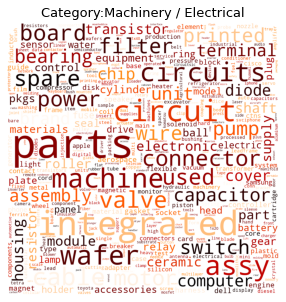

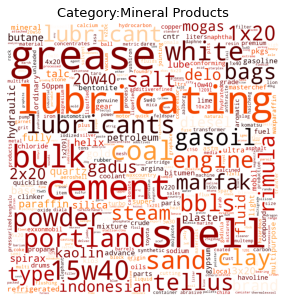

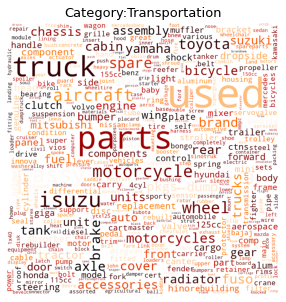

In [8]:
dfGD = pd.read_csv('./post_processed_data/WCData_GD.csv')
for cat in dfGD['category'].unique():
    data = dfGD[dfGD['category']==cat].groupby('word')['count'].sum().to_dict()
    wc = wcprep.generate_from_frequencies(data)
    plt.figure(figsize=(10,5))
    plt.title('Category:{}'.format(cat),fontsize=13)
    plt.axis("off")
    plt.imshow(wc);

<font size="2"><b><center> Figure 6: Most common goods for the top 3 categories  </center></b></font>

### C. Global Department Stores: Where do we get our goods?

Interestingly though, [Figure 7](#fig7) shows that Japan is not far behind China in Machinery / Electrical exports to the Philippines. But **China is a significant player in Philippine imports** as it is one of the top exporters, if not the top exporter, on a per category basis.

<a id="fig7"></a>

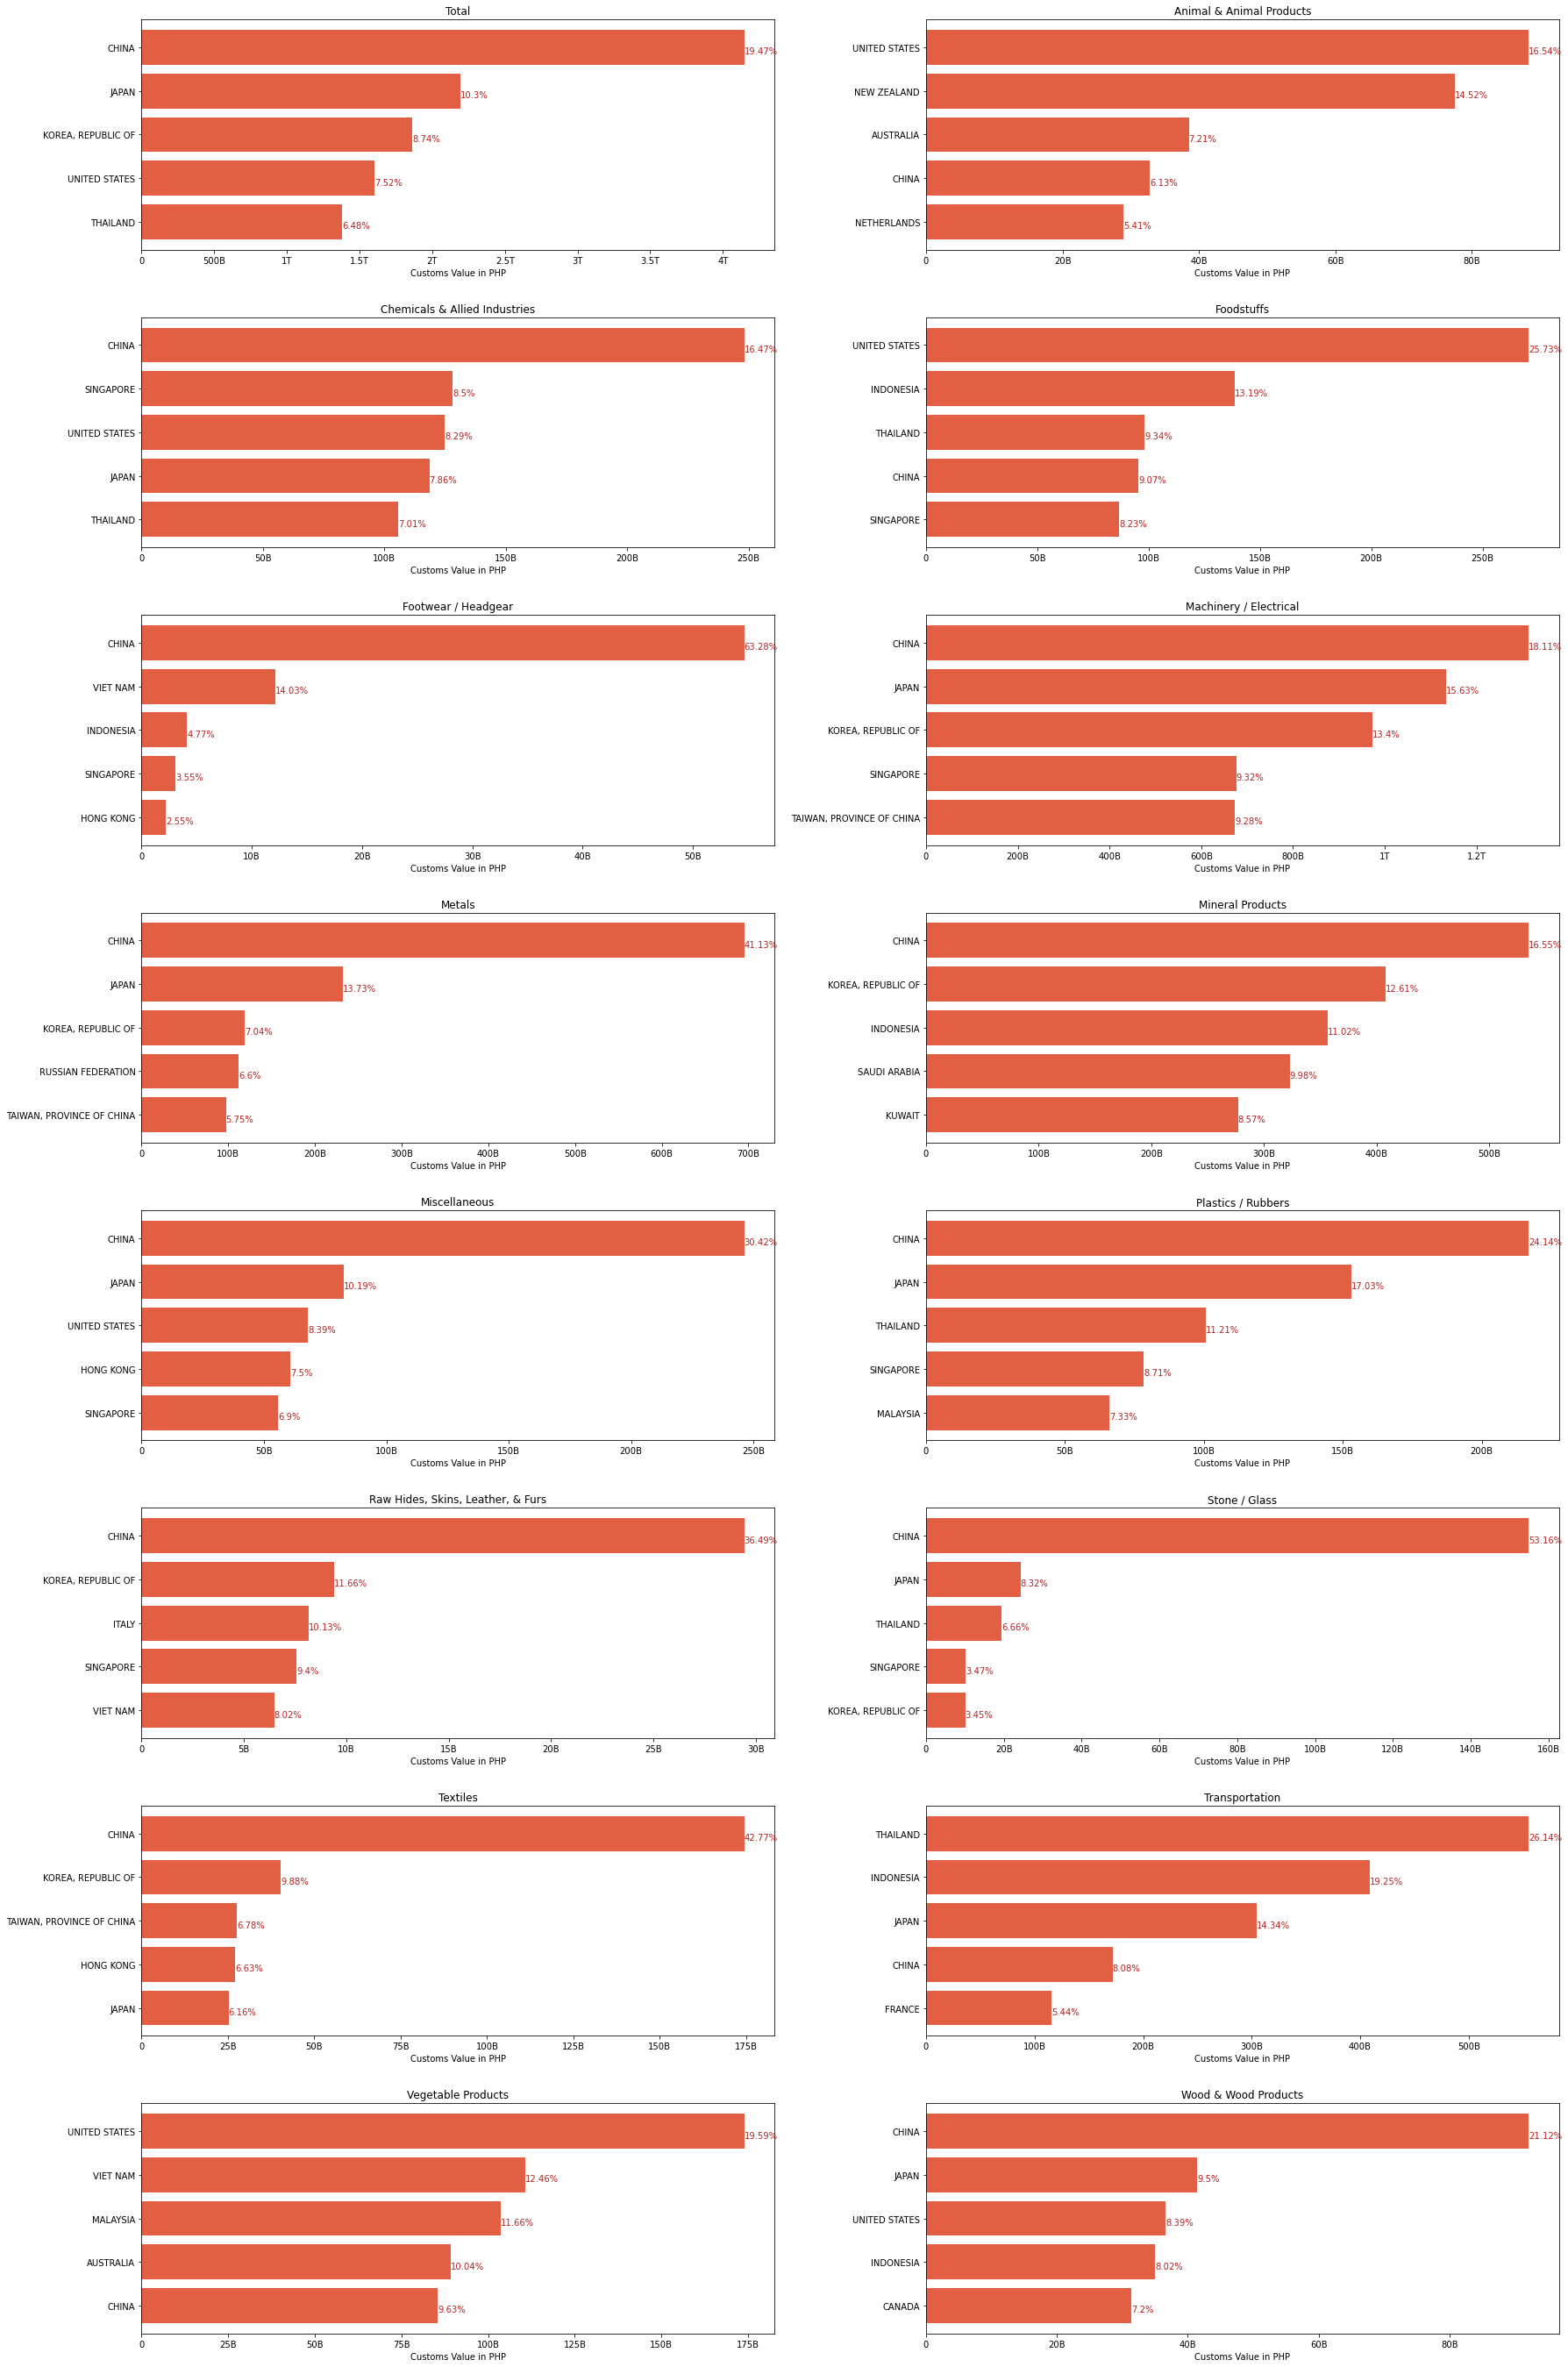

In [12]:
df_cat = pd.read_csv("./post_processed_data/df_categories.csv")

fig, axes = plt.subplots(figsize=(25, 40), ncols=2, nrows=8)
cat = sorted(df_cat["category"].unique())
j = 0
for i, ax in enumerate(axes.flat):
    if i == 0:
        df = (df_cat.groupby("COUNTRYEXPORT")["CUSTOMSVALUEPHP"]
                    .sum()
                    .sort_values(ascending=False)
                    .to_frame()
                    .head())
        ax.barh(y=df.index, width=df["CUSTOMSVALUEPHP"], data=df,
                color='#e25f44')
        ax.invert_yaxis()
        ax.set_xlabel("Customs Value in PHP")
        ax.set_title("Total")
        for i in range(len(df)):
            p = ax.patches[i]
            _x = p.get_x() + p.get_width() + float(0.4)
            _y = p.get_y() + p.get_height() - float(0.25)
            value = ((df["CUSTOMSVALUEPHP"].values[i] /
                      df_cat["CUSTOMSVALUEPHP"].sum()) * 100)
            ax.text(_x, _y, f"{round(value,2)}%", ha="left",
                    color="firebrick", fontsize=10)
            ax.xaxis.set_major_formatter(
                tick.FuncFormatter(reformat_large_tick_values))
    else:
        df = (df_cat[df_cat["category"] == cat[j]]
              .sort_values("CUSTOMSVALUEPHP", ascending=False)
              .head())
        ax.barh(y=df["COUNTRYEXPORT"],
                width=df["CUSTOMSVALUEPHP"],
                data=df,
                color='#e25f44')
        ax.invert_yaxis()
        ax.set_title(df["category"].max())
        ax.set_xlabel("Customs Value in PHP")
        for i in range(len(df)):
            p = ax.patches[i]
            _x = p.get_x() + p.get_width() + float(0.4)
            _y = p.get_y() + p.get_height() - float(0.25)
            value = ((df["CUSTOMSVALUEPHP"].values[i] /
                      df_cat[df_cat["category"] == cat[j]]
                      ["CUSTOMSVALUEPHP"].sum()) * 100)
            ax.text(_x, _y, f"{round(value,2)}%", ha="left",
                    color="firebrick", fontsize=10)
            ax.xaxis.set_major_formatter(
                tick.FuncFormatter(reformat_large_tick_values))
        j += 1

# fig.suptitle("Top 5 Countries per HSCODE Category", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.97], h_pad=3)
plt.show()

<font size="2"><b><center>  Figure 7: Top 5 countries per HSCODE category  </center></b></font>

### D. China's Dominance: The "SM" of Imports

 In [Figure 8](#fig8), it is evident that China dominates certain categories. In two of these categories (Footwear / Headgear and Stone / Glass), the Philippines will be losing more than half of the imported goods value if China stops exporting. Nonetheless, there are categories that are not heavily dependent on China particularly those related to agriculture (Animal and Vegetable Products), Foodstuffs, and Transportation.

<a id="fig8"></a>

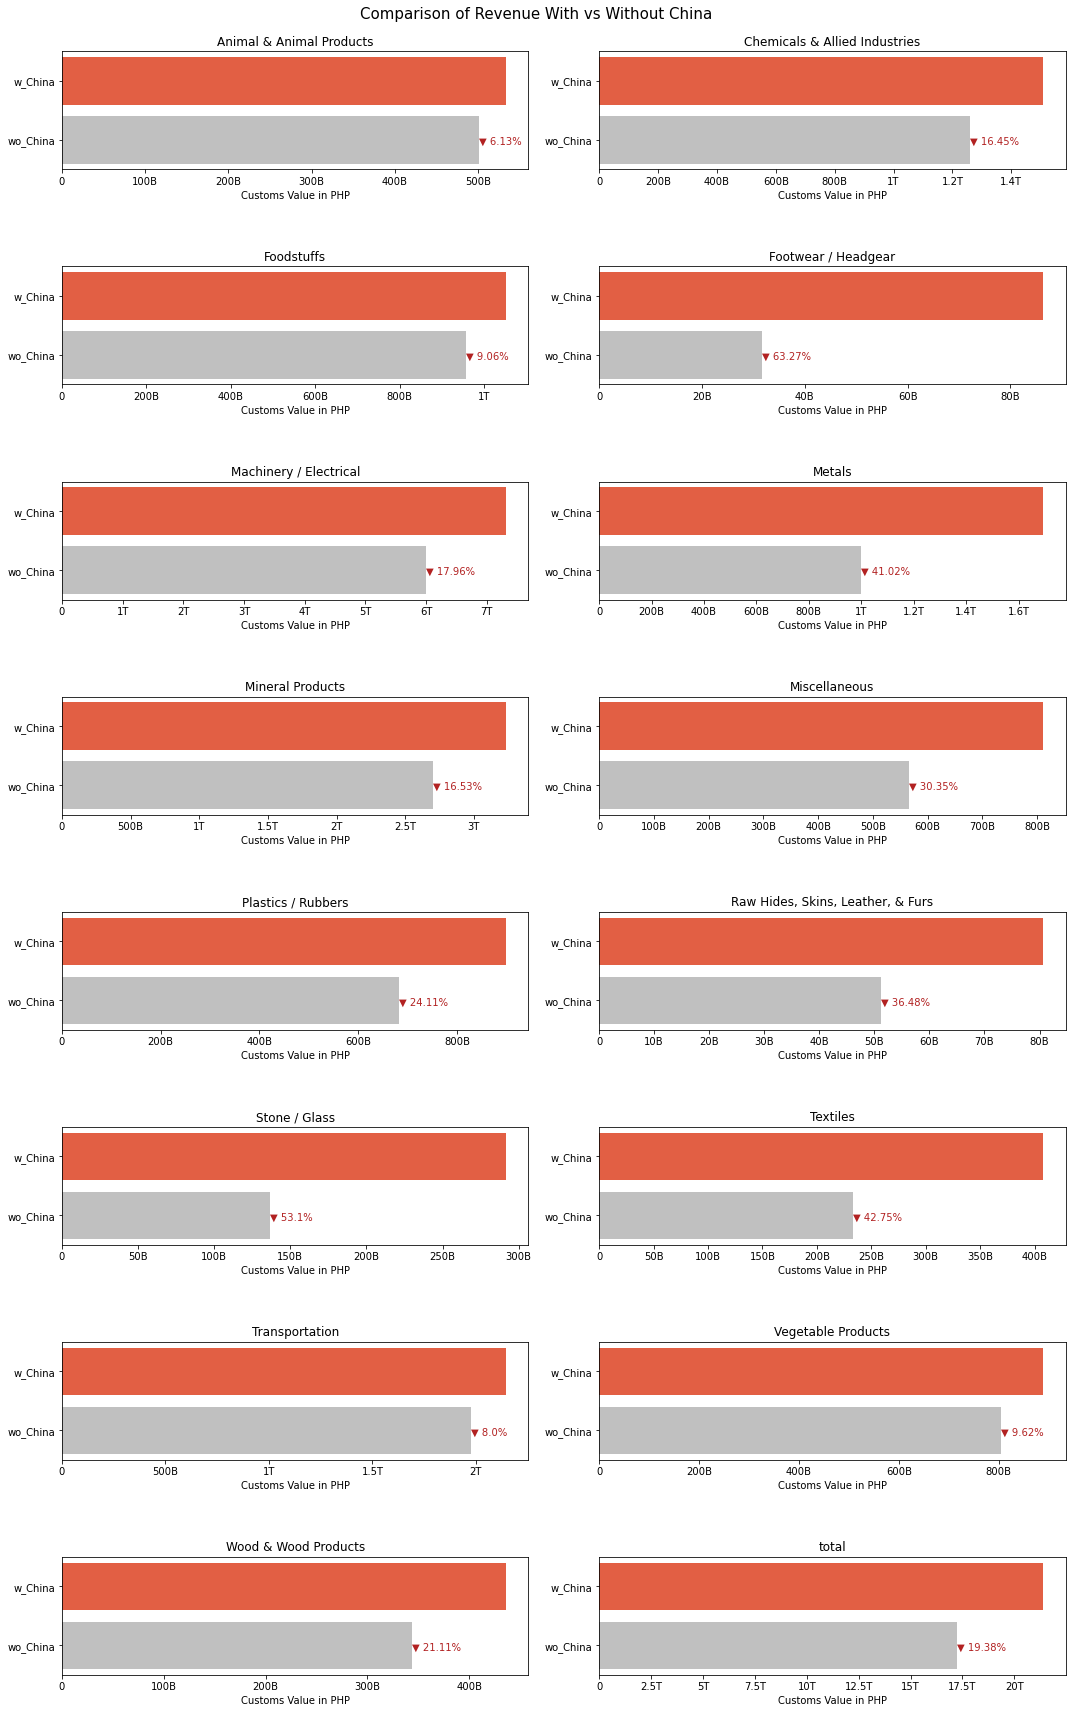

In [10]:
df_compare = pd.read_csv('./post_processed_data/df_china_comparison.csv')

fig, axes = plt.subplots(figsize=(15,25), ncols=2, nrows=8)

df_melt = (df_compare.melt(id_vars=['category'], 
                           value_vars=['w_China', 'wo_China']))
cat = sorted(df_melt['category'].unique())
j = 0
for i, ax in enumerate(axes.flat):
    df = df_melt[df_melt['category'] == cat[j]]
    a = sns.barplot(x = 'value', y = 'variable', data = df, ax=ax,
                    palette=dict(w_China='#fc4e2a', wo_China='silver'))
    ax.set_title(df['category'].max())
    ax.set_ylabel('')
    ax.set_xlabel('Customs Value in PHP')
    p = ax.patches[1]
    _x = p.get_x() + p.get_width() + float(0.4)
    _y = p.get_y() + p.get_height()
    value = (((int(df[df['variable']=='w_China']['value']) - 
                int(df[df['variable']=='wo_China']['value']))/
                int(df[df['variable']=='w_China']['value'])*100))
    ax.text(_x, _y/1.3, f'▼ {round(value,2)}%', ha='left', color='firebrick')
    ax.xaxis.set_major_formatter(
                tick.FuncFormatter(reformat_large_tick_values))
    j += 1

    fig.suptitle('Comparison of Revenue With vs Without China', fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.97], h_pad=5)     
plt.show();

<font size="2"><b><center>   Figure 8: Comparison of invoice amount of total goods imported in the Philippines with and without China per HSCODE category  </center></b></font>

<div><span style="background-color: #425564; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">CONCLUSION</span></div>

Per our analysis on the imports data from the Bureau of Customs (BOC) for the period covering president Rodrigo Duterte’s term from July 2016 to present, persistent in our findings is the role of China being if not the top importing country to the Philippines, but among the top countries in ALL categories. Overall, China provides 19% of imported goods in the Philippines. This information to most people is probably unsurprising since China is the largest exporter of products in the world. While this can be seen as an indicator of a strong relationship with China, it is more evident that we are maybe being monopolized by the said country. This involves building an unreasonable level of dependency on their products which might not affect our economy in the short term, but based on current events, would likely also affect us politically.

It is highly recommended though that alternatives be explored for industries that China monopolizes in. For instance, in terms of Footwear and Headgear, support for domestic production can be boosted to lessen the importation. Exploring ties with other countries that heavily exports products monopolized by China such as Japan for stones and glass will also be beneficial. While the Philippines have shown that it is globalized due to the number of countries it trades with, it can further enhance this by building stronger trade relationship with a diversity of countries. 


<div><span style="background-color: #425564; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">ACKNOWLEDGEMENTS AND REFERENCES</span></div>

- LT10 Term 1 for the use of base map
- Tariff and Customs Codfe of the Philippines, The International Customs Journal, 2003, https://tcc.export.gov/static/philippines_tariff_schedule.pdf 
- Soma, Jonathan. Mapping with geopandas, 2007, http://jonathansoma.com/lede/foundations-2017/classes/geopandas/mapping-with-geopandas/ 
- weiji14. "Comment on Handling KML/CSV with geopandas - DriverError: unsupported driver: u'CSV'", *Stackexchange*, 17 Oct 2018, https://gis.stackexchange.com/questions/114066/handling-kml-csv-with-geopandas-drivererror-unsupported-driver-ucsv 
- Jean-François Fabre♦. Comment on "How to save an Excel worksheet as CSV", *Stackoverflow*, 20 Dec 2017, https://stackoverflow.com/questions/10802417/how-to-save-an-excel-worksheet-as-csv